# Безусловная генерация

In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
from diffusion import DiffusionRunner
from ddpm_sde import DDPM_SDE
from default_mnist_config import create_default_mnist_config

In [17]:
import matplotlib.pyplot as plt
import math
import numpy as np
import torchvision

def show(img):
    # npimg = img.numpy()
    img = img.transpose(2, 0, 1)
    # print(img.shape)
    plt.imshow(np.transpose(img, (1,2,0)), interpolation='nearest')


In [11]:
config = create_default_mnist_config()
runner = DiffusionRunner(config, eval=True)
runner.restore_parameters()

In [12]:
prev_mode = runner.model.training

runner.model.eval()
runner.switch_to_ema()

images = runner.sample_images(runner.config.training.snapshot_batch_size, labels=None).cpu()
nrow = int(math.sqrt(runner.config.training.snapshot_batch_size))
grid = torchvision.utils.make_grid(images, nrow=nrow).permute(1, 2, 0)
grid = grid.data.numpy().astype(np.uint8)

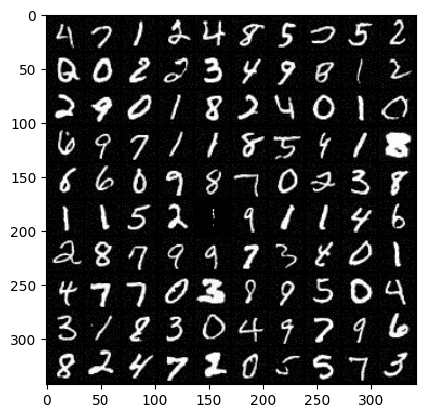

In [13]:
show(grid)

## Classifier-Guidance

In [18]:
from diffusion import ClassGuidDiffusionRunner 

In [19]:
config = create_default_mnist_config()
runner = ClassGuidDiffusionRunner(config, eval=True)
runner.restore_parameters()
runner

In [20]:
runner.model.eval()
runner.switch_to_ema()

images = runner.sample_images(runner.config.training.snapshot_batch_size, labels=None).cpu()
# images = runner.sample_images(1, labels=None).cpu()

nrow = int(math.sqrt(runner.config.training.snapshot_batch_size))
grid = torchvision.utils.make_grid(images, nrow=nrow).permute(1, 2, 0)
grid = grid.data.numpy().astype(np.uint8)

tensor(0.0011, device='cuda:0') tensor(-0.0060, device='cuda:0')
tensor(0.0010, device='cuda:0') tensor(-0.0071, device='cuda:0')
tensor(0.0009, device='cuda:0') tensor(-0.0080, device='cuda:0')
tensor(0.0008, device='cuda:0') tensor(-0.0083, device='cuda:0')
tensor(0.0008, device='cuda:0') tensor(-0.0079, device='cuda:0')
tensor(0.0008, device='cuda:0') tensor(-0.0090, device='cuda:0')
tensor(0.0007, device='cuda:0') tensor(-0.0092, device='cuda:0')
tensor(0.0007, device='cuda:0') tensor(-0.0093, device='cuda:0')
tensor(0.0006, device='cuda:0') tensor(-0.0095, device='cuda:0')
tensor(0.0005, device='cuda:0') tensor(-0.0087, device='cuda:0')
tensor(0.0004, device='cuda:0') tensor(-0.0086, device='cuda:0')
tensor(0.0004, device='cuda:0') tensor(-0.0082, device='cuda:0')
tensor(0.0004, device='cuda:0') tensor(-0.0078, device='cuda:0')
tensor(0.0003, device='cuda:0') tensor(-0.0081, device='cuda:0')
tensor(0.0003, device='cuda:0') tensor(-0.0078, device='cuda:0')
tensor(0.0002, device='cu

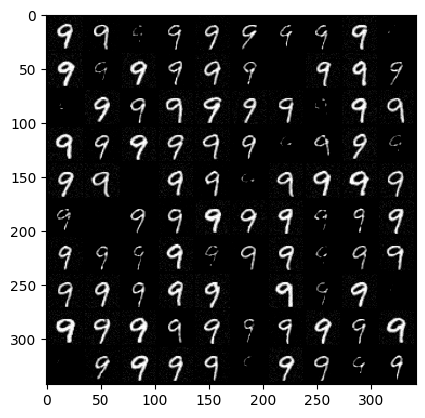

In [21]:
show(grid)